In [96]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

In [97]:
# Import input files
weightsParam = pd.read_csv('../Data/EmpiricalWeightParameters.txt',delimiter='\t',encoding='utf-8')
thresholdParam = pd.read_csv('../Data/EmpiricalThresholdParameters.txt',delimiter=',',encoding='utf-8').set_index("var")

# Set right index
keyArr = np.array(weightsParam.keys())
weightsParam = weightsParam.set_index(keyArr)

In [98]:
# Init 
G = nx.Graph()
thresholds = {}
startingValues = {}
stateValues = {}

# Code for dataframe straight to graph (not enough options)
G = nx.from_pandas_adjacency(weightsParam)

In [99]:
# Fill graph
for key in keyArr:
    thresholds[key] = thresholdParam.at[key, "threshold"]
    startingValues[key] = 0
    stateValues[key] = 0

# Fill node attributes
nx.set_node_attributes(G, thresholds, name="threshold")
nx.set_node_attributes(G, startingValues, name="startingValues")
nx.set_node_attributes(G, stateValues, name="stateValues")

In [100]:
# Fucking around with layout????
# ?? nx.spring_layout

#     for index, row in weightsParam.iterrows():
#         if key != index and row[key] != 0:
#             G.add_edge(index, key, weight=row[key])

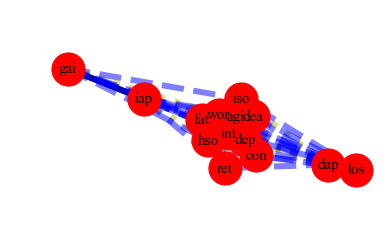

In [101]:
# Create bins for different edges
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1.5]
emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 1.5 and d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=1100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=emedium,
                       width=6, alpha=0.5, edge_color='y', style='dotted')
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family='Times New Roman')
nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=50, threshold=0.00001, weight='weight', scale=4, center=None, dim=2, random_state=None)

plt.axis('off')
plt.show()

14
['dep', 'int', 'los', 'gai', 'dap', 'iap', 'iso', 'hso', 'agi', 'ret', 'fat', 'wor', 'con', 'dea']
73
[('dep', 'int'), ('dep', 'los'), ('dep', 'gai'), ('dep', 'dap'), ('dep', 'iap'), ('dep', 'iso'), ('dep', 'hso'), ('dep', 'agi'), ('dep', 'ret'), ('dep', 'fat'), ('dep', 'wor'), ('dep', 'con'), ('dep', 'dea'), ('int', 'los'), ('int', 'gai'), ('int', 'dap'), ('int', 'iap'), ('int', 'iso'), ('int', 'hso'), ('int', 'agi'), ('int', 'ret'), ('int', 'fat'), ('int', 'wor'), ('int', 'con'), ('int', 'dea'), ('los', 'gai'), ('los', 'dap'), ('los', 'iso'), ('los', 'wor'), ('los', 'con'), ('los', 'dea'), ('gai', 'dap'), ('gai', 'iap'), ('gai', 'iso'), ('gai', 'hso'), ('gai', 'fat'), ('gai', 'wor'), ('dap', 'iso'), ('dap', 'hso'), ('dap', 'agi'), ('dap', 'ret'), ('dap', 'fat'), ('dap', 'wor'), ('dap', 'con'), ('dap', 'dea'), ('iap', 'hso'), ('iap', 'agi'), ('iap', 'ret'), ('iap', 'fat'), ('iap', 'dea'), ('iso', 'hso'), ('iso', 'agi'), ('iso', 'fat'), ('iso', 'con'), ('iso', 'dea'), ('hso', 'ret')

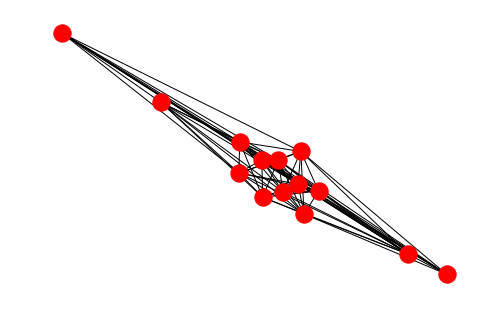

In [102]:
# Some extra info for checking
print(G.number_of_nodes())
print(G.nodes())
print(G.number_of_edges())
print(G.edges())
print(G.neighbors("dep"))
print(G.node["int"]["threshold"])
nx.draw(G)

In [103]:
# To json format for site
data = nx.json_graph.node_link_data(G)
with open('data.json', 'w') as outfile:
    json.dump(data, outfile)